# Regularisation 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score


### (b)

#  This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.


In [3]:
uploaded = files.upload()


Saving Auto.csv to Auto.csv


In [4]:
auto = pd.read_csv(io.BytesIO(uploaded['Auto.csv']))
print(auto.shape)
auto.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### (a) Which of the predictors are quantitative, and which are qualitative?

In [5]:
print(auto.nunique())
print(auto.info())

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
name            301
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB
None


In [6]:
#why is horsepower object, when it should be float or int
print(auto['horsepower'].unique())
# we can see that there is a question mark
auto['horsepower'] = auto['horsepower'].replace('?',np.nan)
auto['horsepower'] = auto['horsepower'].fillna(0)
auto['horsepower'] = auto['horsepower'].astype(int)

[130 165 150 140 198 220 215 225 190 170 160  95  97  85  88  46  87  90
 113 200 210 193 100 105 175 153 180 110  72  86  70  76  65  69  60  80
  54 208 155 112  92 145 137 158 167  94 107 230  49  75  91 122  67  83
  78  52  61  93 148 129  96  71  98 115  53  81  79 120 152 102 108  68
  58 149  89  63  48  66 139 103 125 133 138 135 142  77  62 132  84  64
  74 116  82]


In [7]:
auto = auto.dropna()
auto.shape

(392, 9)

In [8]:
# Skewness and kurtosis
print("Skewness: %f" %auto['mpg'].skew())
print("Kurtosis: %f" %auto['mpg'].kurt())


Skewness: 0.457092
Kurtosis: -0.515993


**link for skew and  kurtosis**


https://www.statisticalaid.com/skewness-and-kurtosis-in-statistics-shape-of-distributions/

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


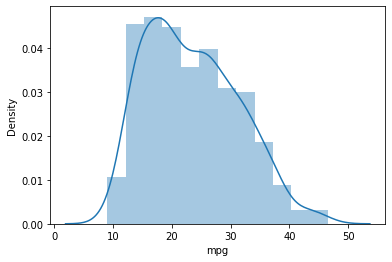

In [9]:
sns_plot = sns.distplot(auto["mpg"])


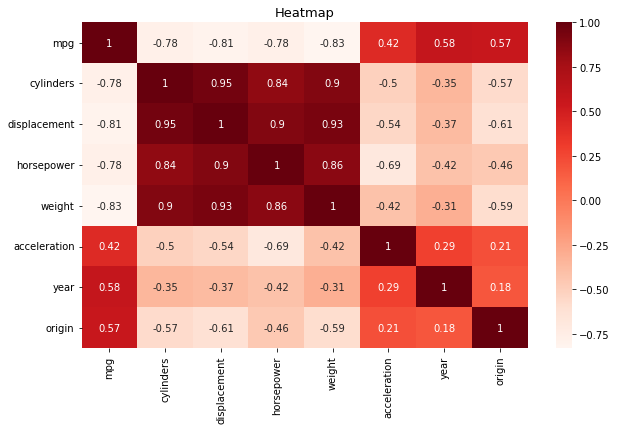

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(auto.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap',fontsize=13)
plt.show()


In [11]:
print("Predictor variables") 
X = auto.drop(['mpg','name'], axis=1)
print(list(X.columns))
print("Dependent variable") 
y = auto[['mpg']]
print(list(y.columns))


Predictor variables
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
Dependent variable
['mpg']


In [12]:
from sklearn import preprocessing
print("Scale all the columns successfully done") 
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)


Scale all the columns successfully done


**link to preprocessing data**

Center to the mean and component wise scale to unit variance.



scaled x= (x-mean)/standard deviation

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


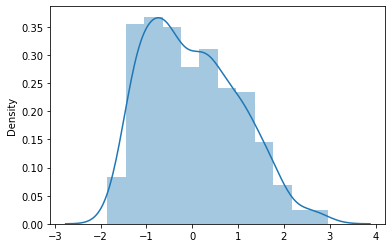

In [13]:
#plot of mpg after scaling see x-axis values
sns_plot = sns.distplot(y_scaled)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


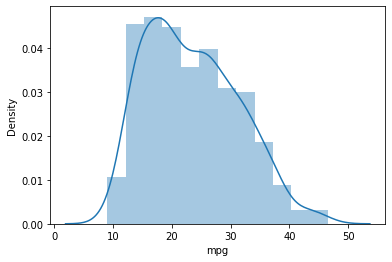

In [14]:
#plot of mpg before scaling see x-axis values

sns_plot = sns.distplot(auto["mpg"])


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=1)


In [16]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idcoff, columnname in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(columnname, regression_model.coef_[0][idcoff]))


The coefficient for cylinders is -0.04425493311241941
The coefficient for displacement is 0.2396626380258875
The coefficient for horsepower is -0.03290766796380204
The coefficient for weight is -0.754316489495187
The coefficient for acceleration is 0.07596519821100475
The coefficient for year is 0.35329734966129506
The coefficient for origin is 0.13416801079368584


In [17]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


The intercept for our model is -0.02007782836484938


In [18]:
print(" LINEAR REGRESSION TRAINING DATA  R2 error:%s"%regression_model.score(X_train, y_train))
print("LINEAR TEST DATA  R2 error:%s"%regression_model.score(X_test, y_test))
LR_train_Rsquare_err=regression_model.score(X_train, y_train)
LR_test_Rsquare_err=regression_model.score(X_test, y_test)


 LINEAR REGRESSION TRAINING DATA  R2 error:0.8153339627635714
LINEAR TEST DATA  R2 error:0.8295700536937244


In [19]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))


Ridge model: [[-0.04172282  0.22727118 -0.03668133 -0.74280679  0.07344902  0.35207621
   0.13365659]]


In [20]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [-0.         -0.         -0.04121063 -0.56739337  0.          0.27060298
  0.04839719]


In [21]:
print("RIDGE TRAINING DATA   R2 error:%s"%ridge.score(X_train, y_train))
print("RIDGE TEST DATA R2 error:%s"%ridge.score(X_test, y_test))
Ridge_train_Rsquare_err=ridge.score(X_train, y_train)
Ridge_test_Rsquare_err=ridge.score(X_test, y_test)


RIDGE TRAINING DATA   R2 error:0.8153209429866735
RIDGE TEST DATA R2 error:0.8297231001975875


In [22]:
print("LASSO TRAINING DATA   R2 error:%s"%lasso.score(X_train, y_train))
print("LASSO TEST DATA R2 error:%s"%lasso.score(X_test, y_test))
Lasso_train_Rsquare_err=lasso.score(X_train, y_train)
Lasso_test_Rsquare_err=lasso.score(X_test, y_test)



LASSO TRAINING DATA   R2 error:0.7908862486718302
LASSO TEST DATA R2 error:0.803174085807221


In [23]:
# initialize list of lists
data = [['LINEAR', LR_train_Rsquare_err,LR_test_Rsquare_err], ['RIDGE', Ridge_train_Rsquare_err,Ridge_test_Rsquare_err], ['LASSO',Lasso_train_Rsquare_err,Lasso_test_Rsquare_err]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Regression TYPE', 'TRAIN error','TEST error'])
 
# print dataframe.
df


,Regression TYPE,TRAIN error,TEST error
0,LINEAR,0.815334,0.829570
1,RIDGE,0.815321,0.829723
2,LASSO,0.790886,0.803174


In [24]:
print(regression_model.intercept_[0])
print(ridge.intercept_[0])
print(lasso.intercept_[0])

-0.02007782836484938
-0.020296071015148173
-0.019966545266454305


In [25]:
A = np.vstack([regression_model.coef_, ridge.coef_,lasso.coef_])
#A = np.vstack([A,lasso.coef_])
B=np.array([[regression_model.intercept_[0],ridge.intercept_[0],lasso.intercept_[0]]]).T
#print(type(B))
B=np.hstack([A,B])
#print(B)
#print(B.transpose())
print("COEFFICIENTS")
# initialize data of lists.
print("\n")
 
# Create DataFrame
df = pd.DataFrame(B,index=['Linear Regression','Ridge Regression','Lasso Regression'],columns = ['INTERCEPT','cylinders',	'displacement',	'horsepower',	'weight',	'acceleration',	'year',	'origin'])
 
# Print the output.
df


COEFFICIENTS




,INTERCEPT,cylinders,displacement,horsepower,weight,acceleration,year,origin
Linear Regression,-0.044255,0.239663,-0.032908,-0.754316,0.075965,0.353297,0.134168,-0.020078
Ridge Regression,-0.041723,0.227271,-0.036681,-0.742807,0.073449,0.352076,0.133657,-0.020296
Lasso Regression,-0.000000,-0.000000,-0.041211,-0.567393,0.000000,0.270603,0.048397,-0.019967


**link for regularisation**

https://www.analyticsvidhya.com/blog/2021/11/study-of-regularization-techniques-of-linear-model-and-its-roles/

In [26]:
# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
# load the dataset
# define model

model = ElasticNet(alpha=0.1, l1_ratio=1)
#for elasticnet l1=1 means it is lasso regression with lambda=alpha
#for elasticnet l1=0 means it is ridge regression with lambda=alpha
#for elasticnet if 0 < l1 < 1 means it is lasso+ ridge regression with lasso multiplier=(alpha*l1_ratio),ridge multiplier=(alpha(1-l1_ratio))


# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, X_train,y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = cross_val_score(model, X_train,y_train, scoring='r2', cv=None, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print("scores: %s\n"%scores)
print('Mean R2 (EQUALS lasso  with lambda=0.1  AS l1=1): %.3f ' % (mean(scores)))

scores: [0.76789817 0.74639453 0.77244505 0.77730128 0.84467451]

Mean R2 (EQUALS lasso  with lambda=0.1  AS l1=1): 0.782 


In [27]:
model = ElasticNet(alpha=0.3, l1_ratio=0)
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, X_train,y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = cross_val_score(model, X_train,y_train, scoring='r2', cv=None, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print("scores: %s\n"%scores)
print('Mean R2(Equals ridge  with lambda=0.3  AS l1=0): %.3f ' % (mean(scores)))

scores: [0.77089951 0.74107644 0.77658437 0.77745091 0.81617892]

Mean R2(Equals ridge  with lambda=0.3  AS l1=0): 0.776 


In [28]:
model = ElasticNet(alpha=0.7, l1_ratio=0.25)
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, X_train,y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = cross_val_score(model, X_train,y_train, scoring='r2', cv=None, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print("scores: %s\n"%scores)
print('Mean R2(Equals lasso+ridge where   lasso=(alpha*l1) ridge=(alpha(1-l1))): %.3f ' % (mean(scores)))

scores: [0.66115376 0.65317892 0.64180808 0.66885253 0.77758755]

Mean R2(Equals lasso+ridge where   lasso=(alpha*l1) ridge=(alpha(1-l1))): 0.681 


**SEARCH CV**

In [35]:
uploaded = files.upload()


Saving SEARCHCV.png to SEARCHCV.png


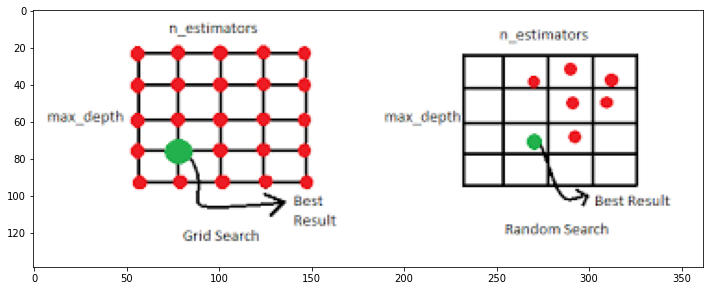

In [37]:
import matplotlib.image as mpimg
img=mpimg.imread('SEARCHCV.png')
fig = plt.figure()
fig.set_size_inches(12,15)

plt.imshow(img)

**GRID SEARCH CV**

This is one of the hyper parameter tuning method. In this method, a grid of important hyperparameter values is passed and the model is evaluated for each and every combination. The set of hyperparameters which gives highest accuracy is considered as best. 


**RANDOM SEARCH CV**


In Random search CV, the best combination can not be identified because all the combinations are not tested. But the advantage is we can test a broad range of values for hyperparameters within the same computation time as grid search CV.

**LinearRegression Hyperparameters:**
 1. fit_intercept=True or False (use intercept or dont use intercept)
 2. normalize=True or False  ('deprecated' used to normalise X)

**Ridge Regression Hyperparameters:**
 1. fit_intercept=True or False (use intercept or dont use intercept)
 2. normalize=True or False  ('deprecated' used to normalise X)
 3. solver = ['svd', 'cholesky', 'lsqr', 'sag']
 4. alpha(lambda) = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]


**Lasso Regression Hyperparameters:**
 1. fit_intercept=True or False (use intercept or dont use intercept)
 2. normalize=True or False ('deprecated' used to normalise X)
 3. solver = ['svd', 'cholesky', 'lsqr', 'sag']
 4. alpha(lambda) =[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

**solvers(regression calculations)**

svd:matrix methods(single value decomposition)

cholesky:cholesky matrix factorisation

lsqr:least squares method

sag:Stochastic Average Gradient


In [47]:
# random search linear regression model on the auto insurance dataset
from scipy.stats import loguniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
# define model
model = Ridge()
# define evaluation
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
#space['alpha'] = loguniform(1e-5, 100)
space['alpha']=[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
space['fit_intercept'] = [True, False]
#space['normalize'] = [True, False]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='r2', n_jobs=-1, cv=None, random_state=1)
# execute search
result = search.fit(X_train,y_train,)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 80 is smaller than n_iter=500. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best Score: 0.798136008497064
Best Hyperparameters: {'solver': 'sag', 'fit_intercept': False, 'alpha': 1}


In [34]:
# grid search linear regression model on the auto insurance dataset
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
# define model
model = Ridge()
# define evaluation
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
#space['normalize'] = [True, False]
# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=None)
# execute search
result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7981257443904803
Best Hyperparameters: {'alpha': 1, 'fit_intercept': False, 'solver': 'sag'}
